In [4]:
# Optional: install dependencies if not already present
# Uncomment if running on a fresh JupyterHub environment

# %pip install tapipy requests pillow matplotlib
import getpass
from tapipy.tapis import Tapis

username = input("Enter your Tapis username: ")
password = getpass.getpass("Enter your Tapis password: ")

tapis = Tapis(base_url="https://designsafe.tapis.io", username=username, password=password)
tapis.get_tokens()
tapis_jwt = tapis.access_token.access_token

Enter your Tapis username:  nathanf
Enter your Tapis password:  ········


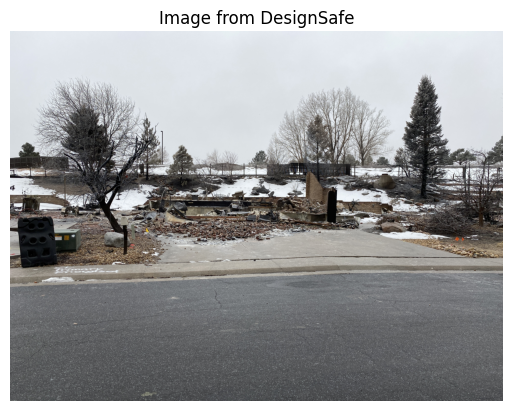

In [5]:
# Fetch and display image from Tapis
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

system_id = "designsafe.storage.published"
path = "/PRJ-3379/RApp/uwrapid/Home/Photo 1642618419.jpg"

# Fetch image bytes using Tapis Files API
image_bytes = tapis.files.getContents(systemId=system_id, path=path)
image = Image.open(BytesIO(image_bytes))

# Display the image
plt.imshow(image)
plt.axis("off")
plt.title("Image from DesignSafe")
plt.show()


In [6]:
# Cell 3: Run inference using FastAPI
import requests

inference_request = {
    "files": [
        {
            "systemId": system_id,
            "path": path
        }
    ]
}

headers = {
    "Content-Type": "application/json",
    "X-Tapis-Token": tapis_jwt
}

FASTAPI_URL = "http://localhost:8080/inference/sync"
response = requests.post(FASTAPI_URL, headers=headers, json=inference_request)

response_json = response.json()
response_json


{'model': 'google/vit-base-patch16-224',
 'results': [{'systemId': 'designsafe.storage.published',
   'path': '/PRJ-3379/RApp/uwrapid/Home/Photo 1642618419.jpg',
   'predictions': [{'label': 'ashcan, trash can, garbage can, wastebin, ash bin, ash-bin, ashbin, dustbin, trash barrel, trash bin',
     'score': 0.3344},
    {'label': 'mailbox, letter box', 'score': 0.3184},
    {'label': 'garbage truck, dustcart', 'score': 0.0441},
    {'label': 'park bench', 'score': 0.0259},
    {'label': 'snowplow, snowplough', 'score': 0.0238}]}]}